## The Data Science Process

Data Science is a multidisciplinary field that combines techniques from statistics, Mathematics, Computer Science and Domain Expertise to gather actionable insights and knowledge from structured and unstructured data.

The Data Science Life Cycle essentially involves the following phases:

**1. Problem Definition :** In this phase, the problem or question to be addressed using data science techniques is clearly defined in terms of context, identifying stakeholders and specifying the goals and objectives of the project.


**2. Data Collection :** Relevant data needs to be collected from various sources ensuring the data is of high quality and sufficient for analysis.

**3. Data Preparation :** Raw data often involves preprocessing before it can be used for analysis. This phase involves cleaning the data (handling missing values, outliers, etc.), transforming it into a suitable format, and performing feature engineering to extract relevant features for analysis.

**4.Exploratory Data Analysis (EDA) :** In this phase, the data is explored visually and statistically to gain insights and identify patterns, trends, and relationships. Visualization techniques and summary statistics are commonly used to understand the structure and distribution of the data.

**5. Model Building :** Once the data is prepared and understood, predictive or descriptive models are built to address the problem defined in the first phase. This involves selecting appropriate algorithms, training the models on the data, and evaluating their performance using suitable metrics. The models are assessed based on their ability to generalize to new, unseen data and their alignment with the project objectives.

**6. Model Deployment :** Model deployment is taking your trained model and making it available in a production environment. Deploying your model will make your model’s predictions on incoming data available to users or other systems.  This involves integrating the model into existing systems or workflows and ensuring scalability, reliability, and security.

## Why is Exploratory Data Analysis (EDA) important?

Exploratory Data Anaklysis (EDA) serves as a critical foundation for the Data Science Process, guiding subsequent analysis, modelling and decision making. It helps uncover valuable insights, assess data quality, and inform hypothesis generation, ultimately leading to more accurate and impactful outcomes.

### Types of EDA

EDA are generally classified in two ways:

    1) Non-graphical or Graphical
    2) Univariate or Multivariate

#### Non-graphical  vs. Graphical EDA
Non-graphical EDA involves calculations of summary/descriptive statistics while Graphical type of analysis will contain data visualisations.

#### Univariate vs Multivariate Analysis
Univariate EDA is performed on one variable at a time as the prefix 'uni' indicates while Multivariate type of analysis explores the relationship between two or more variables. When only comparing two variables it is known as **bivariate analysis** as indicated by the prefix 'bi'.

Read a more detailed explanation <a href="https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf">here</a>.

## EDA on Health Insurance Claim.

We are going to look into the Health Insurance Claims  <a href="https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health/download?datasetVersionNumber=2">dataset</a> which provides information needed to assess health insurance claims. Factors including age, gender, Body Mass Index (BMI), blood pressure, diabetic status, number of children, region, smoking status and claim amounts are contained in the data.

 ### Importing the Data, Outline,Cleaning and Details.

First, we'll import the libraries we will need, followed by the data.

In [1]:
# Import all the necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset to read and analyse
df = pd.read_csv("insurance_data.csv")
# Check the dataset contents, with head() function
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


Using these four commands, we will perform a basic analysis:

    - df.head()
    - df.info()
    - df.shape
    - df.describe()

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is **object** and if it is a numerical variable the Dtype is an **int64** or **float64**.

In [3]:
# To see the information about the DataFrame with .info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


Null values for each feature can also be checked by using the following command:

    - df.isnull().sum()
    
This command will provide the total number of null values appearing in each feature.


Duplicated values can also be checked using the following code:

    - df.duplicated().sum()


In [4]:
# Checking for null values
df.isnull().sum()

,0
index,0
PatientID,0
age,5
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,3


It is observed that age feature has 5 records with null value, and region feature has 3 records with null values.



In [5]:
#  Interpolating the null values
df = df.interpolate()                ## numerical features
df = df.fillna(df.mode().iloc[0])    ## categorical features
df.isna().sum()                      ## check for any null values, after modifying

,0
index,0
PatientID,0
age,0
gender,0
bmi,0
bloodpressure,0
diabetic,0
children,0
smoker,0
region,0


This confirms that there are no null values in the data after interpolation.

In [6]:
# Check for duplicated values
df.duplicated().sum()

0

We can drop all the irrelevant columns.

In [7]:
# Remove irrelavent columns
df = df.drop(['index','PatientID'], axis=1)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,23.166667,male,33.3,82,Yes,0,No,southeast,1135.94
3,22.333333,male,33.7,80,No,0,No,northwest,1136.40
4,21.500000,male,34.1,100,No,0,No,northwest,1137.01


In [8]:
# Checking the shape of the dataset
print("The shape of the dataset is ", df.shape)
print(f"Rows : {df.shape[0]}")
print(f"Columns : {df.shape[1]}")

The shape of the dataset is  (1340, 9)
Rows : 1340
Columns : 9


Our final dataset for analysis will now contain 1340 records in 9 columns.

### Data Analysis

#### Non Graphical Univariate Analysis



We will perform Non-Graphical Univariate Analysis. This is where we will be looking at the **Descriptive Statistics** of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

    - df.describe()

This command will provide the mean, standard deviation and a five number summary of each numerical feature.
The five number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used for creating the box plot.

In [9]:
# Descriptive statistics for each numerical column rounded off to 2 dp
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,1340.0,38.02,11.13,18.00,29.00,37.00,47.0,60.00
bmi,1340.0,30.67,6.11,16.00,26.28,30.40,34.7,53.10
bloodpressure,1340.0,94.16,11.43,80.00,86.00,92.00,99.0,140.00
children,1340.0,1.09,1.21,0.00,0.00,1.00,2.0,5.00
claim,1340.0,13252.75,12109.61,1121.87,4719.68,9369.62,16604.3,63770.43


We can see the statistics of a specific feature by using the same command and specifying the column.

    - df.age.describe() or df['age'].describe()

In [10]:
df['age'].describe()

,age
count,1340.000000
mean,38.016791
std,11.128445
min,18.000000
25%,29.000000
50%,37.000000
75%,47.000000
max,60.000000


Additionall useful descriptors are skewness and Kurtosis of a distribution. **Skewness** is a measure of assymetry while **Kurtosis** is a measure of "peakedness" or "tailed-ness" relative to the Gaussian distribution.

A skewness value of 0 indicates a perfect symmetry i.e the distribution is perfectly symmetrical around its mean while positive skewness(right-skewed) indicates the majority of data points are concentrated on the lower end, with some extreme high-value outliers. Negative Skewness (Left-Skewed)shows that the majority of data points are concentrated on the higher end, with some extreme low-value outliers.


Kurtosis describes how spread out or concentrated the extreme values (outliers) in the tails of the distribution are.
- Leptokurtic (High Kurtosis): A distribution with high kurtosis has more extreme outliers than would be expected from a normal distribution.
- Platykurtic (Low Kurtosis): A distribution with low kurtosis has fewer extreme outliers than would be expected from a normal distribution.
- Mesokurtic (Medium Kurtosis): The distribution is neither too peaked nor too flat.

In [11]:
# Perform skewness and Kurtosis for all the numeric columns
import scipy.stats as stats

df_numeric = df.select_dtypes(include='number')
results = []
for col in df_numeric.columns:
    skewness = df_numeric[col].skew()
    kurtosis = df_numeric[col].kurt()
    results.append([col, skewness, kurtosis])
df_stats = pd.DataFrame(results, columns=['Column', 'Skewness', 'Kurtosis'])
df_stats

,Column,Skewness,Kurtosis
0,age,0.116559,-0.952033
1,bmi,0.285972,-0.060200
2,bloodpressure,1.483534,2.890032
3,children,0.940299,0.205463
4,claim,1.516747,1.610246


#### Graphical Univariate Analysis

Graphical Univariate Analysis methods are more qualitative and involve a degree of subjective analysis.
You can look at the **distribution** of any numerical feature by using the following plots:

    - histogram
    - density plot
    - box plot
    - violin plot
    
For a categorical feature we will use a:

    - bar plot

A **Histogram** represents the frequency (count) or proportion (count/total count) of cases for a range of values. Histograms are one of the best ways to quickly learn a lot about your data, including central tendency, spread, modality, shape and outliers.



We can use the Matplotlib library or Seaborn library to create a list of all numerical features to visualise these features at the same time


Text(0, 0.5, 'No. of Patients')

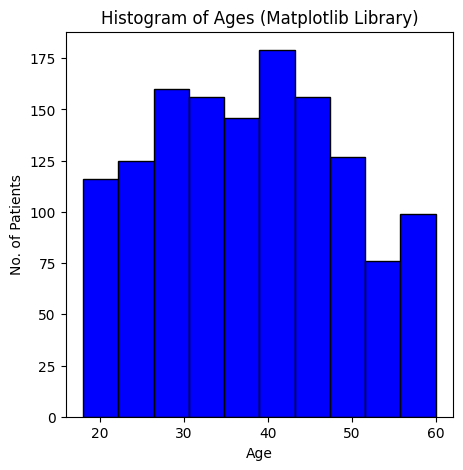

In [12]:
# Matplotlib Histogram
# Create a figure with the desired size
plt.figure(figsize=(5, 5))
plt.hist(df_numeric['age'], color = 'blue', edgecolor = 'black',bins = 10)
# Add labels
plt.title('Histogram of Ages (Matplotlib Library)')
plt.xlabel('Age')
plt.ylabel('No. of Patients')

Text(0, 0.5, 'No. of Patients')

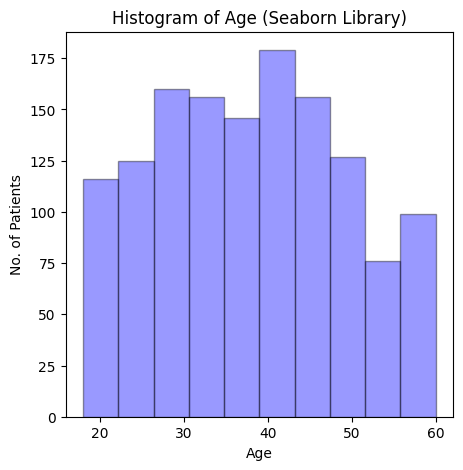

In [13]:
# Seaborn Histogram
plt.figure(figsize=(5, 5))
sns.distplot(df_numeric['age'], hist=True, kde=False, bins=10, color = 'blue',hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Age (Seaborn Library)')
plt.xlabel('Age')
plt.ylabel('No. of Patients')

Creating a Histogram of all the Numerical Features.

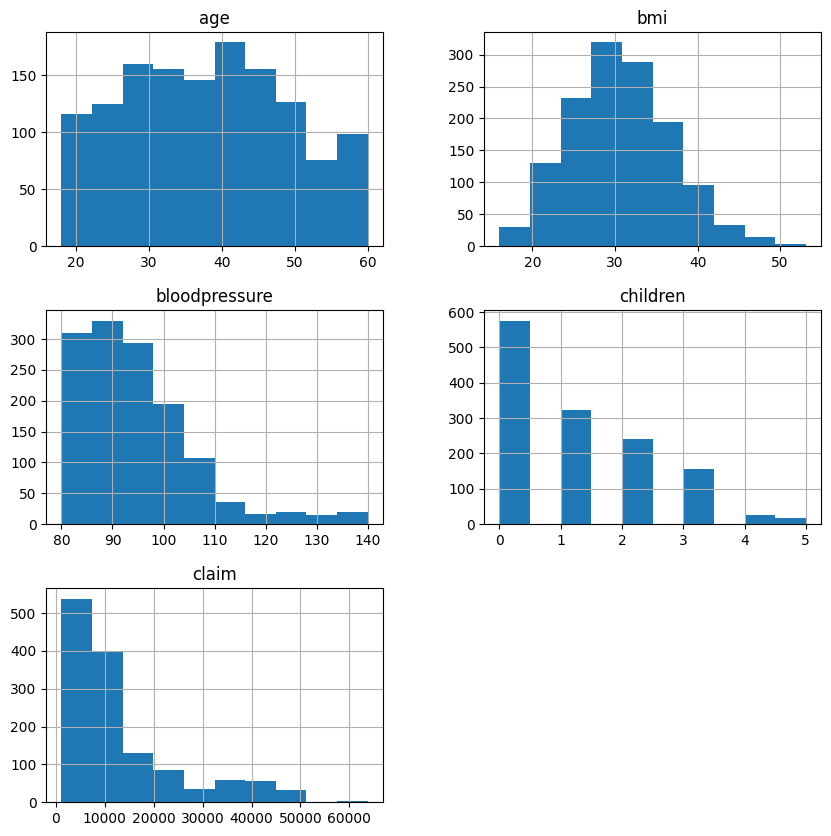

In [14]:
# Create a list of all numerical features
# Matplotlib Histogram
df_numeric.hist(layout=(3, 2),figsize=(10,10));

The **Density Plot** can be considered a smoothed, continuous version of a histogram estimated from the data and does not depend on the bins.

Using the Matplotlib Library:

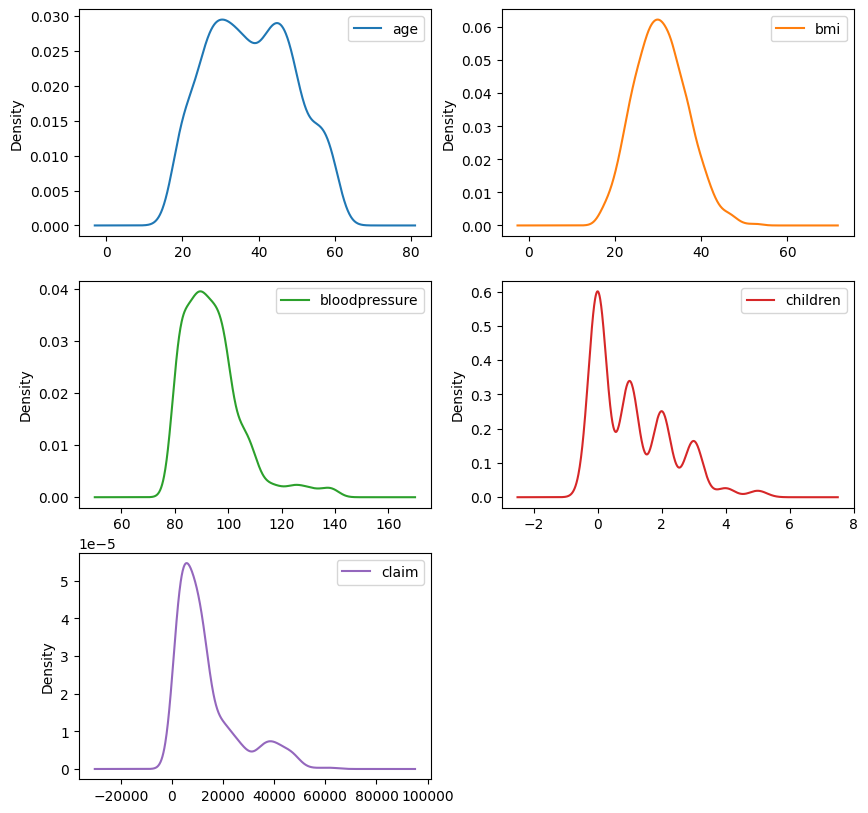

In [15]:
# Matplotlib Density Plot
df_numeric.plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

Using the Seaborn Library:



```
# Seaborn Density Plot
sns.kdeplot(data=df_numeric, x = 'age') # Variable of Choice
```




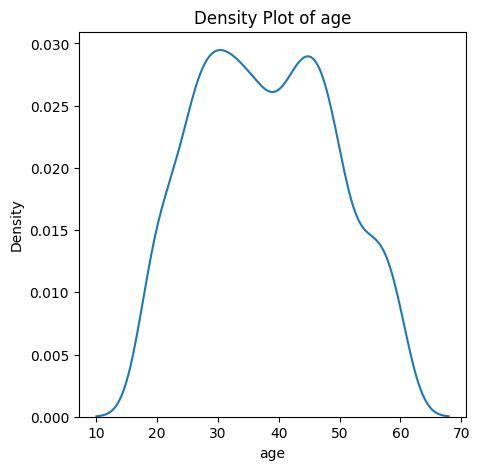

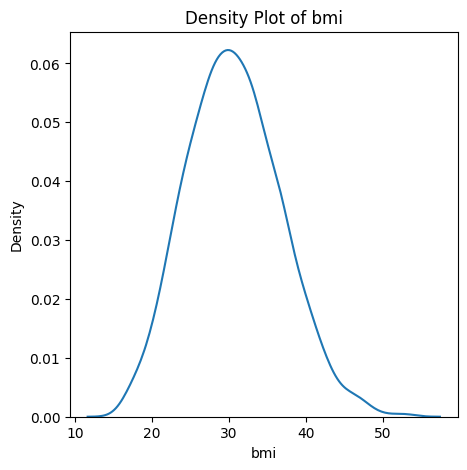

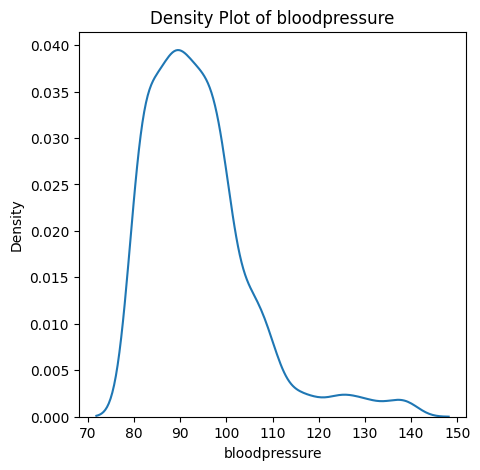

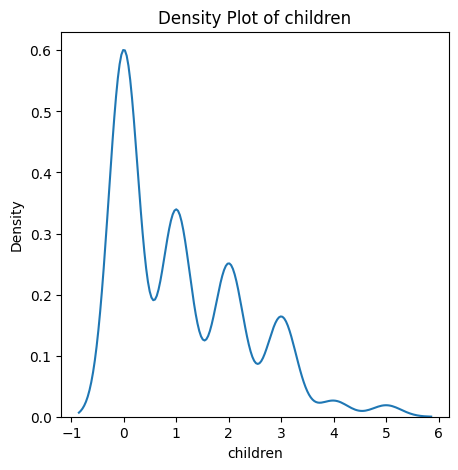

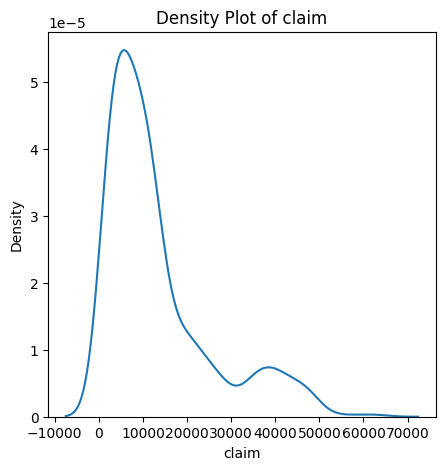

In [16]:
# Seaborn Density Plot for all numeric variables
for col in df_numeric.columns:
    plt.figure(figsize=(5, 5))
    sns.kdeplot(data=df_numeric, x=col)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

Both the Density Plot and Histogram can also be combined into a single output.

<Axes: xlabel='age', ylabel='Count'>

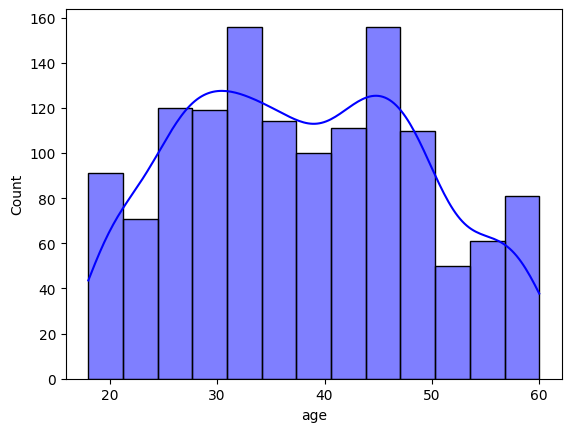

In [17]:
sns.histplot(df_numeric['age'], kde=True, color='blue')

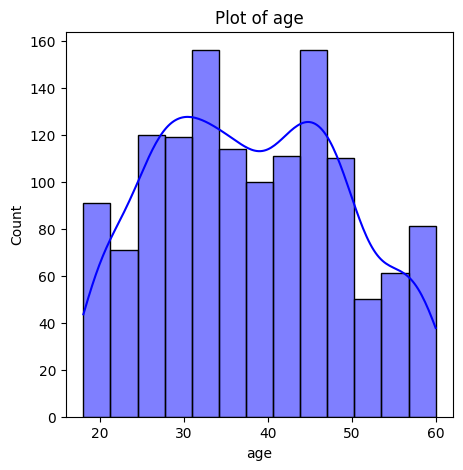

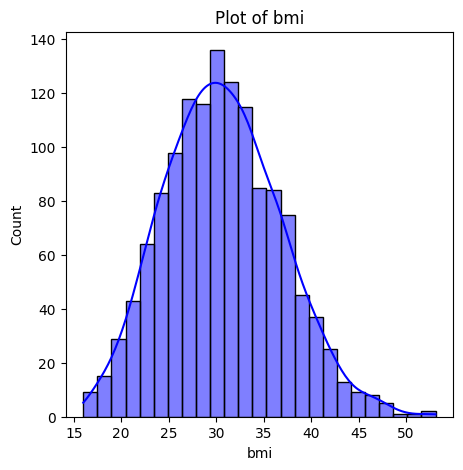

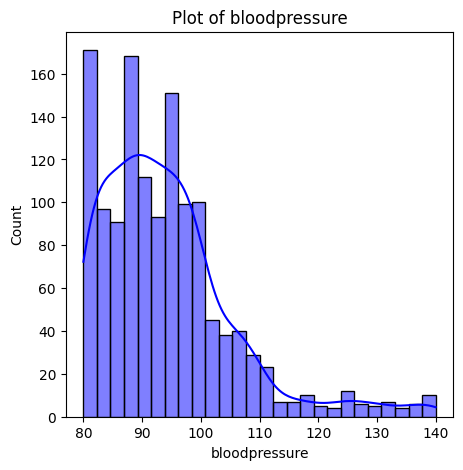

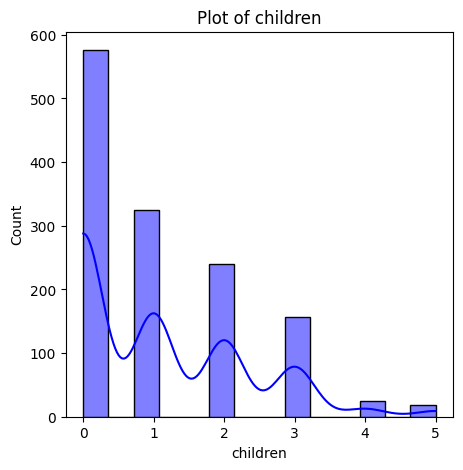

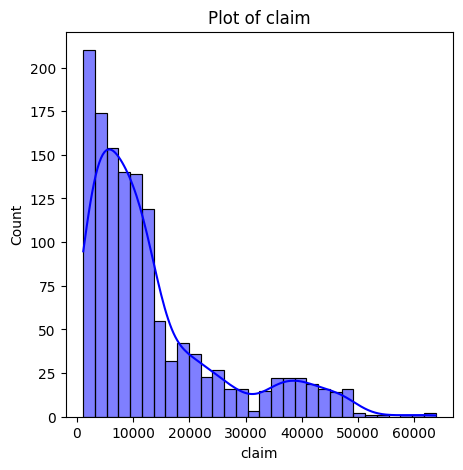

In [18]:

for col in df_numeric.columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(df_numeric[col], kde=True, color='blue')
    plt.title(f'Plot of {col}')
    #plt.xlabel(col)
    #plt.ylabel('Density')
    plt.show()

**Boxplots** and **Violin Plots** are effective to display the distribution of data for the numeric variables. A boxplot (or box-and-whisker plot) additionally provides the five number summary of a dataset's distribution :

    - Min,Q1,Q2,Q3 and Max.
Additionally, outliers are often plotted as individual points.

A violin plot is an extension of the boxplot that also shows the probability density of the data. It combines a boxplot with a kernel density estimate (KDE), effectively providing both summary statistics and the data's distribution shape.


Codes

```
# Boxplot
sns.boxplot(x='age', data=df)

# Violin Plot
sns.violinplot(x='age', data=df)
```



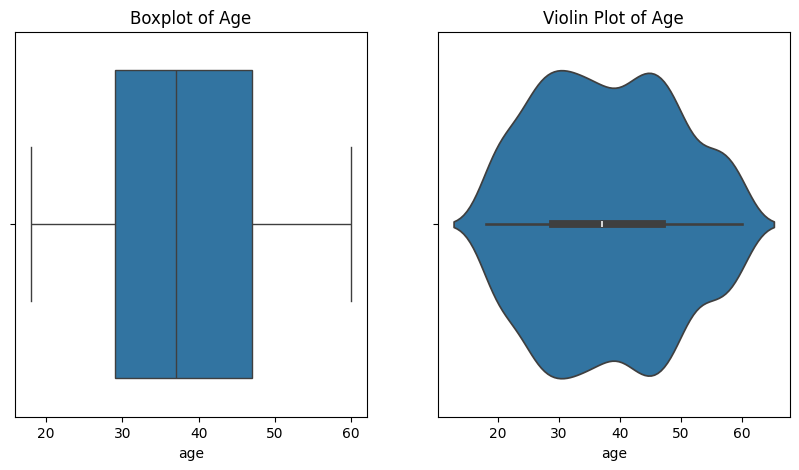

In [19]:
# Boxplot and Violin Plots for age
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x=df_numeric['age'], ax=axs[0])
axs[0].set_title('Boxplot of Age')
sns.violinplot(x=df_numeric['age'], ax=axs[1])
axs[1].set_title('Violin Plot of Age')
plt.show()


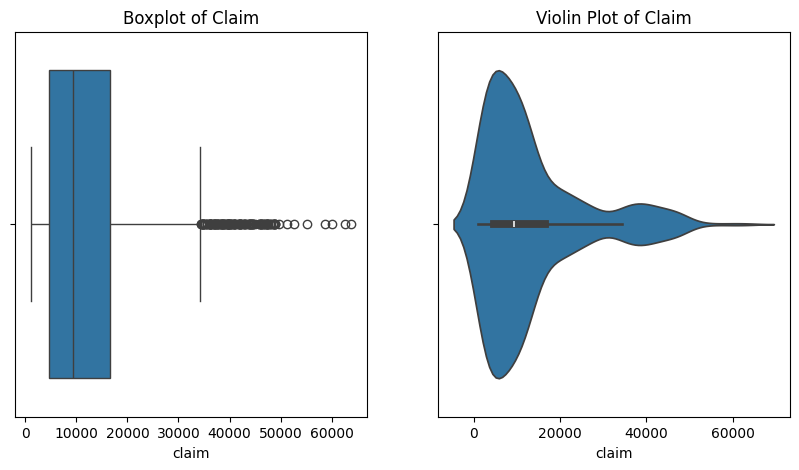

In [20]:
# Boxplot and Violin Plots for claim
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x=df_numeric['claim'], ax=axs[0])
axs[0].set_title('Boxplot of Claim')
sns.violinplot(x=df_numeric['claim'], ax=axs[1])
axs[1].set_title('Violin Plot of Claim')
plt.show()

We can create a bar plot to display the frequency distribution of categorical variables. This can be done by using seaborn's `countplot`.

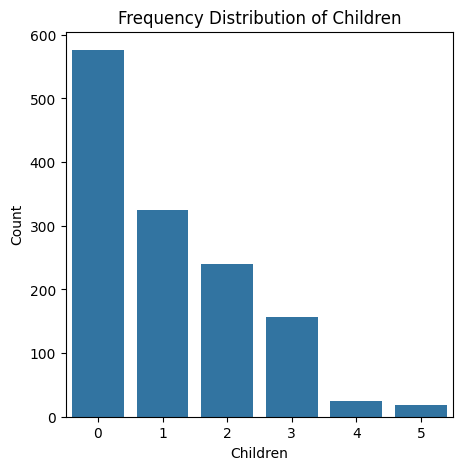

In [21]:
# Bar Plot for Children
plt.figure(figsize=(5, 5))
sns.countplot(x='children', data=df)
plt.title('Frequency Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

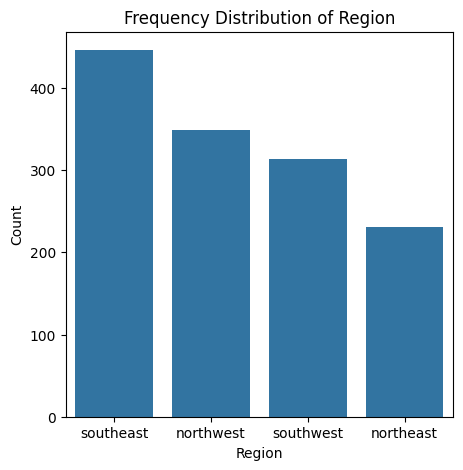

In [22]:
# Bar Plot for region
plt.figure(figsize=(5, 5))
sns.countplot(x='region', data=df)
plt.title('Frequency Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

#### Non Graphical Multivariate Analysis

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases.


 **Pearson correlation** measures the linear relationship between features and assumes that the features are normally distributed. The value ranges from -1 to +1, where:
  - -1: Perfect negative correlation (as one variable increases, the other decreases)
  -0: No correlation (no linear relationship)
  - +1: Perfect positive correlation (as one variable increases, the other also increases)

The command we will use to determine the correlation between features is:

    - df.corr()

Note: This function can only operate on numerical data so we use `numeric_only=True` to automatically ignore non-numeric columns.

In [23]:
# Pearsons Correlation
df.corr(numeric_only=True)

,age,bmi,bloodpressure,children,claim
age,1.000000,-0.045369,-0.057507,-0.020356,-0.022175
bmi,-0.045369,1.000000,0.143544,0.012092,0.197401
bloodpressure,-0.057507,0.143544,1.000000,-0.031682,0.531341
children,-0.020356,0.012092,-0.031682,1.000000,0.069233
claim,-0.022175,0.197401,0.531341,0.069233,1.000000



Observations from the Matrixs:

    - age & bmi = Slight negative correlation (-0.045369). This suggests that as age increases, bmi tends to slightly decrease, but the relationship is very weak.
    - bmi & bloodpressure = Moderate positive correlation (0.143544) exists. This suggests that as BMI increases, blood pressure tends to increase.
    - bloodpressure & claim = Strong positive correlation (0.531341) exists. This suggests that as blood pressure increases, the claim amount tends to increase significantly.


#### Graphical Multivariate Analysis

Graphical multivariate analysis in Python involves visualizing relationships between multiple variables to better understand patterns, trends, or groupings in the data.

For the multivariate graphical analysis the following visualisations will be considered:

    - Heatmap
    - Scatter Plot
    - Pair Plot
    - Joint Plot

A **heatmap** is a data visualization method that employs color to represent values in a matrix or two-dimensional dataset, enabling viewers to easily identify patterns, correlations, and trends in the data.
The Seaborn library will be used for this basic heatmap visualisation.

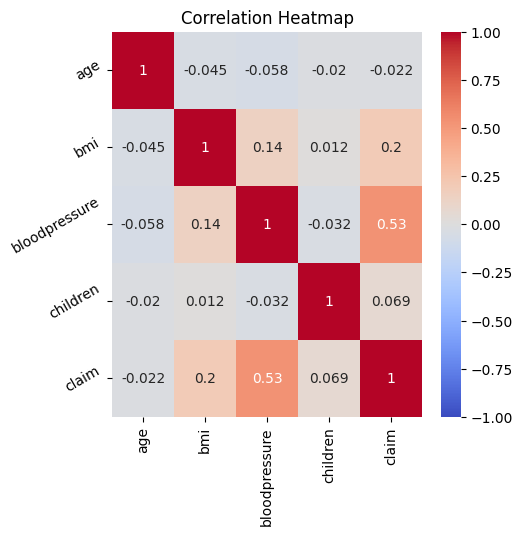

In [24]:
# Heatmap
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(df.corr(numeric_only=True), annot=True,vmin=-1, vmax=1,cmap='coolwarm')
heatmap.set_title('Correlation Heatmap')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)
plt.show()

A **scatter plot** is a data visualization that represents values for two variables as points on a Cartesian coordinate system, with one variable on the x-axis and the other on the y-axis, where each point corresponds to an observation in the dataset.
We will create a scatter plot to determine if there is a relationship between `age` and `claim`. The parameter `hue` is set to the feature `smoker`, colouring the points according to whether a person is a smoker or not

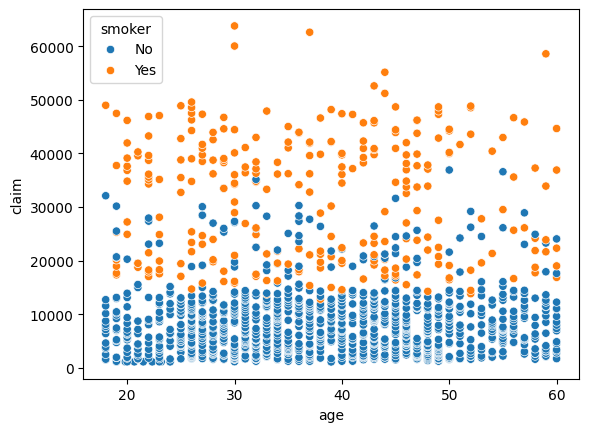

In [25]:
sns.scatterplot(x='age',y='claim',hue='smoker', data=df);

The plot reveals that claim value is typically high for people who have a Smoking Habit

A **pair plot**  shows pairwise relationships among multiple variables in a dataset through a grid of scatter plots, each representing the interaction between two variables.

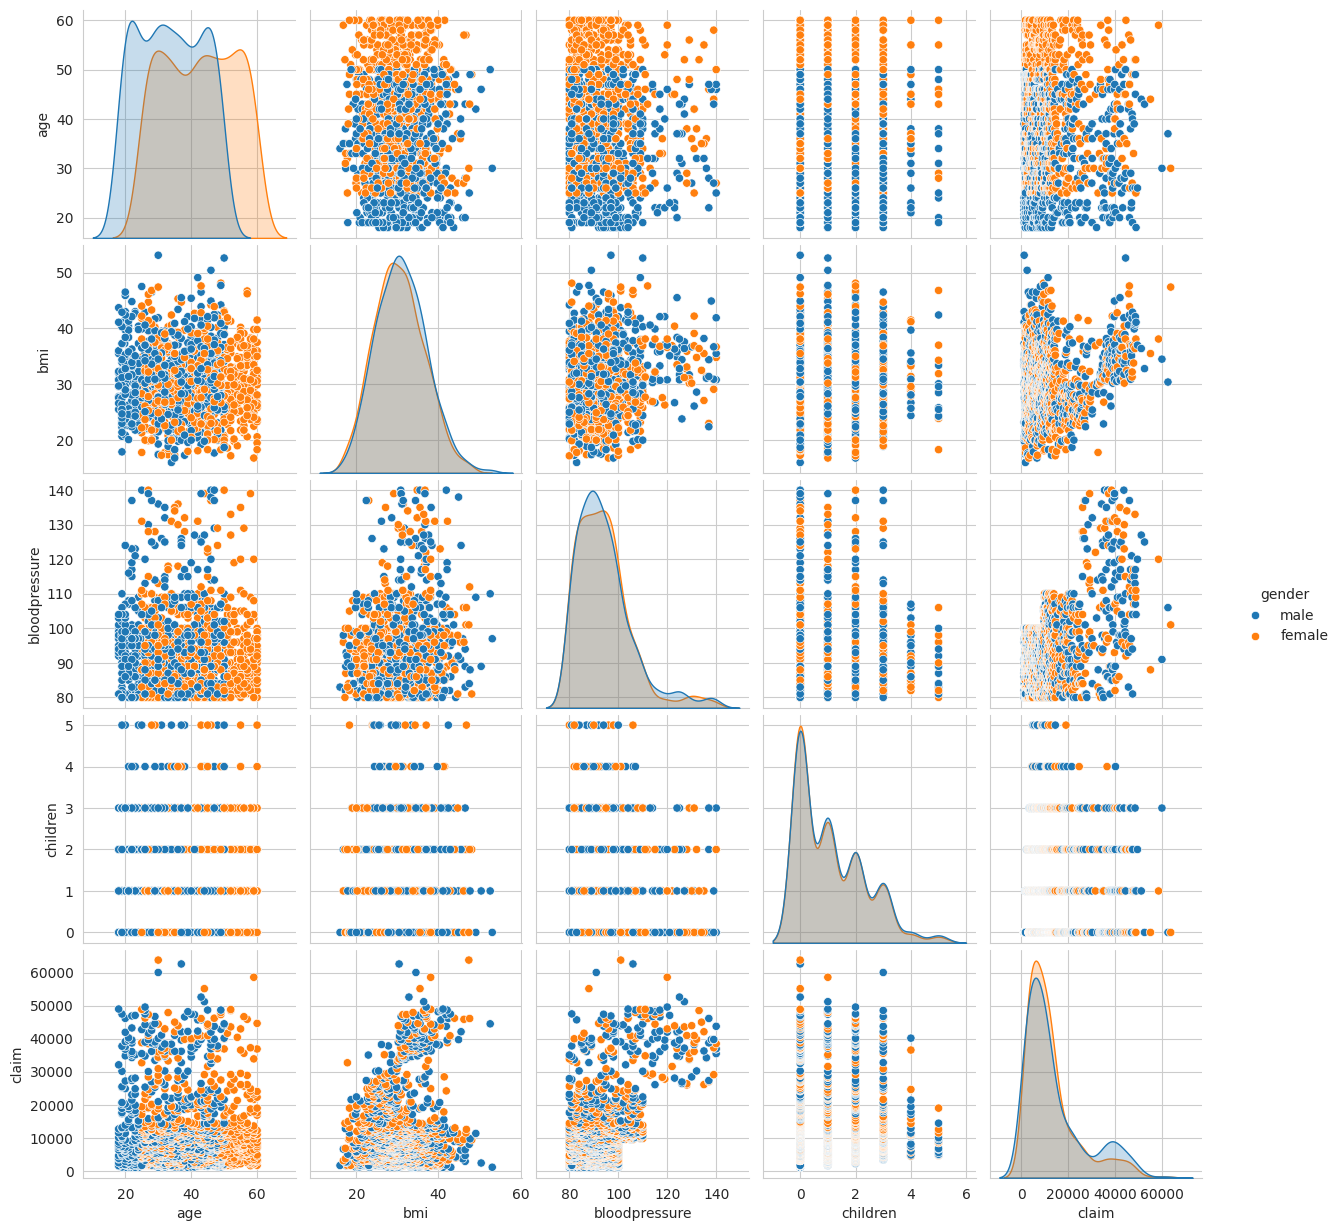

In [26]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="gender")
plt.show()


A **joint plo**t in Python is a type of visualization that combines a scatterplot (or other bivariate plots) with univariate plots for the marginal distributions of each variable. It provides a comprehensive view of the relationship between two variables, including their individual distributions and potential correlations.

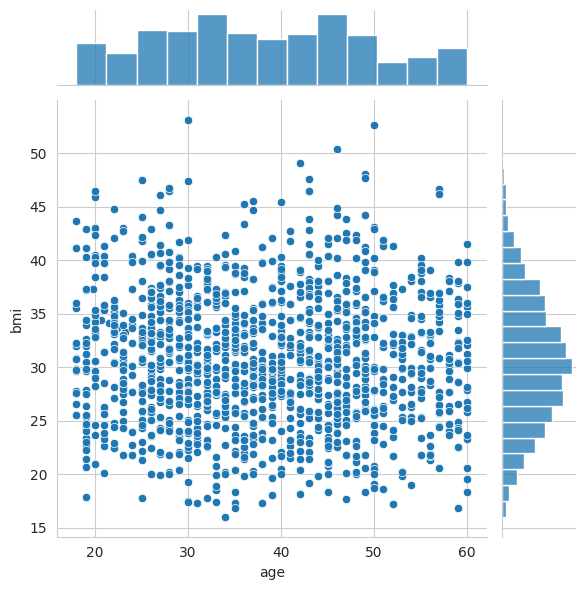

In [27]:
sns.jointplot(x = 'age', y = 'bmi', data = df);

## Conclusion

You should always perform appropriate EDA before
further analysis of your data. Perform whatever steps are necessary
to become more familiar with your data, check for obvious mistakes,
learn about variable distributions, and learn about relationships between variables.


The primary objective of EDA is to analyze the data for distribution, outliers and anomalies in the dataset. It enable us to direct specific testing of the hypothesis. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations. It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.


When done properly, EDA can dramatically simplify or advance your data science problem and may even solve it!
